# CNN classifier for the MNIST dataset

In [1]:
#### PACKAGE IMPORTS ####

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

![MNIST overview image](data/mnist.png)

#### The MNIST dataset

In this assignment will use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). It consists of a training set of 60,000 handwritten digits with corresponding labels, and a test set of 10,000 images. The images have been normalised and centred. The dataset is frequently used in machine learning research, and has become a standard benchmark for image classification models. 

- Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. "Gradient-based learning applied to document recognition." Proceedings of the IEEE, 86(11):2278-2324, November 1998.

Our goal is to construct a neural network that classifies images of handwritten digits into one of 10 classes.

#### Load and preprocess the data

In [2]:
# Load the MNIST data

mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

First, preprocess the data by scaling the training and test images so their values lie in the range from 0 to 1.

In [3]:
def scale_mnist_data(train_images, test_images):
    """
    This function takes in the training and test images as loaded in the cell above, and scales them
    so that they have minimum and maximum values equal to 0 and 1 respectively.
    This function should return a tuple (train_images, test_images) of scaled training and test images.
    """
    train_images = train_images / 255.
    test_images = test_images / 255.

    return (train_images, test_images)

In [4]:
scaled_train_images, scaled_test_images = scale_mnist_data(train_images, test_images)

In [5]:
# Dummy channel dimension (extension)

scaled_train_images = scaled_train_images[..., np.newaxis]
scaled_test_images = scaled_test_images[..., np.newaxis]

#### Build the convolutional neural network model

A CNN model to fit to the data, using the Sequential API:

* The model should use the `input_shape` in the function argument to set the input size in the first layer.
* A 2D convolutional layer with a 3x3 kernel and 8 filters. Use 'SAME' zero padding and ReLU activation functions. Make sure to provide the `input_shape` keyword argument in this first layer.
* A max pooling layer, with a 2x2 window, and default strides.
* A flatten layer, which unrolls the input into a one-dimensional tensor.
* Two dense hidden layers, each with 64 units and ReLU activation functions.
* A dense output layer with 10 units and the softmax activation function.

In [6]:
def get_model(input_shape):
    """
    This function should build a Sequential model according to the above specification. Ensure the 
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    This function should return the model.
    """
    model = Sequential([
        Conv2D(8, (3,3), padding="SAME", activation="relu", input_shape=input_shape),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(64, activation="relu"),
        Dense(64, activation="relu"),
        Dense(10, activation="softmax")
    ])
    
    return model

In [7]:
model = get_model(scaled_train_images[0].shape)

C:\Users\ishux\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Compile the model

We will now compile the model using the `compile` method. To do so, we need to specify an optimizer, a loss function and a metric to judge the performance of your model.

In [8]:
def compile_model(model):
    """
    This function takes in the model returned from your get_model function, and compiles it with an optimiser,
    loss function and metric.
    Compile the model using the Adam optimiser (with default settings), the cross-entropy loss function and
    accuracy as the only metric. 
    This function doesn't need to return anything; the model will be compiled in-place.
    """
    model.compile(
        optimizer = "Adam",
        loss = "sparse_categorical_crossentropy",
        metrics = ['accuracy'])

In [9]:
compile_model(model)

#### Fit the model to the training data

Now we should train the model on the MNIST dataset, using the model's `fit` method. Set the training to run for 5 epochs, and return the training history to be used for plotting the learning curves.

In [10]:
def train_model(model, scaled_train_images, train_labels):
    """
    This function should train the model for 5 epochs on the scaled_train_images and train_labels. 
    This function should return the training history, as returned by model.fit.
    """
    history = model.fit(scaled_train_images, train_labels, epochs=5)
    return history    

In [11]:
history = train_model(model, scaled_train_images, train_labels)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8802 - loss: 0.4145
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9758 - loss: 0.0804
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9825 - loss: 0.0554
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9863 - loss: 0.0421
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9902 - loss: 0.0312


#### Plot the learning curves

We will now plot two graphs:
* Epoch vs accuracy
* Epoch vs loss

We will load the model history into a pandas `DataFrame` and use the `plot` method to output the required graphs.

In [12]:
frame = pd.DataFrame(history.history)

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

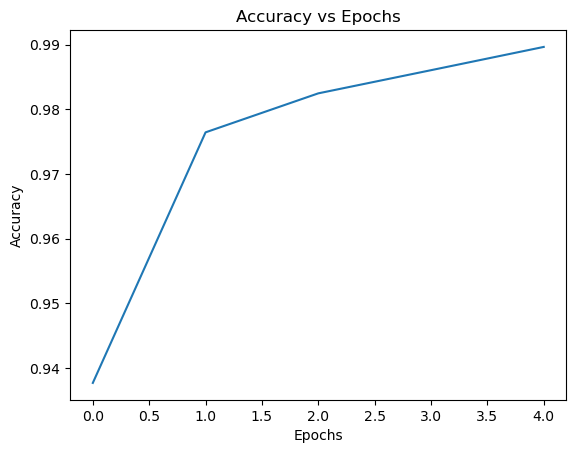

In [13]:
# Accuracy vs Epochs plot

acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

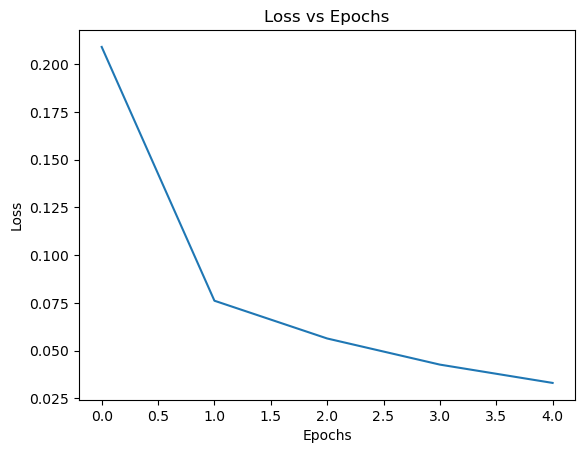

In [14]:
# Loss vs Epochs plot

acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

#### Evaluate the model

Finally, we should evaluate the performance of your model on the test set, by calling the model's `evaluate` method.

In [15]:
def evaluate_model(model, scaled_test_images, test_labels):
    """
    This function should evaluate the model on the scaled_test_images and test_labels. 
    This function should return a tuple (test_loss, test_accuracy).
    """
    test_loss, test_accuracy = model.evaluate(scaled_test_images, test_labels)
    return (test_loss, test_accuracy)

In [16]:
test_loss, test_accuracy = evaluate_model(model, scaled_test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9776 - loss: 0.0685
Test loss: 0.058122772723436356
Test accuracy: 0.9807000160217285


#### Model predictions

Let's see some model predictions! We will randomly select four images from the test data, and display the image and label for each. 

For each test image, model's prediction (the label with maximum probability) is shown, together with a plot showing the model's categorical distribution.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


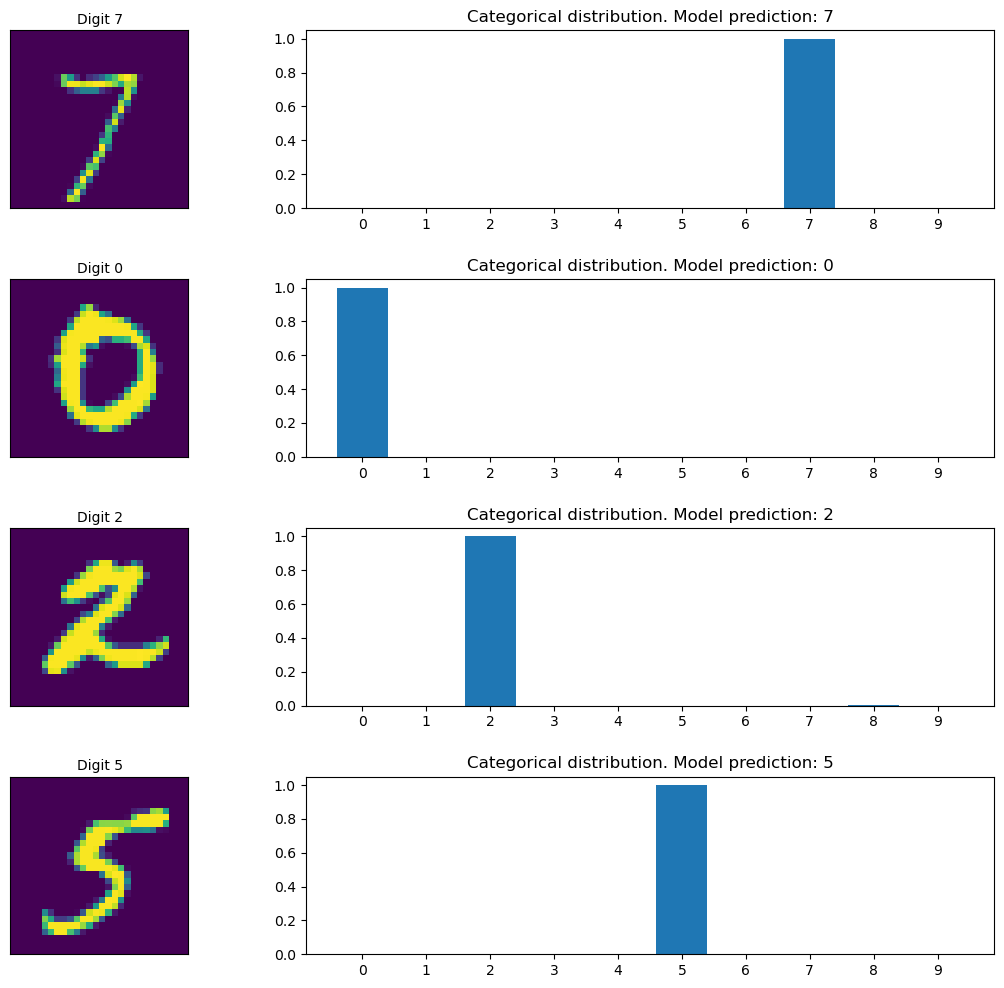

In [17]:
# Model predictions on randomly selected test images

num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()